In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
import matplotlib.pyplot as plt

In [7]:
# Read in the panos_5.csv file
df = pd.read_csv('panos_10.csv')

# Display the first few rows to verify the data was loaded correctly
df.head()


,pano_id,lat,lon
0,-iALpGENlyNtP-JrxKO3Og,34.039977,-118.449210
1,kq4_EGOLZrb9OqJlU9YzSQ,34.040034,-118.449242
2,DM59wOqUrWzyHS7LwaiYUQ,34.040018,-118.449154
3,zTdTvlzcwPCbxIP0UvNV3A,34.040406,-118.448856
4,Xan21m4B6VBQxPUgEpm-kw,34.040475,-118.447552


Number of clusters: 2500
                  pano_id        lat         lon  cluster
0  -iALpGENlyNtP-JrxKO3Og  34.039977 -118.449210        0
1  kq4_EGOLZrb9OqJlU9YzSQ  34.040034 -118.449242        1
2  DM59wOqUrWzyHS7LwaiYUQ  34.040018 -118.449154        2
3  zTdTvlzcwPCbxIP0UvNV3A  34.040406 -118.448856        3
4  Xan21m4B6VBQxPUgEpm-kw  34.040475 -118.447552        4
5  ddkVOwqDECnaMBTKsRk5pA  34.040617 -118.447673        5
6  Y0253CTfdgMbdjAnDr7NZw  34.040702 -118.447747        6
7  MdW3AdbBqbtE9p6R68CQIw  34.041000 -118.447514        7
8  PgRvk81kMcnhaPmGj0SjsQ  34.040949 -118.447602        8
9  uRXOoR9ce-XkbM49nTEmwA  34.040902 -118.447680        9


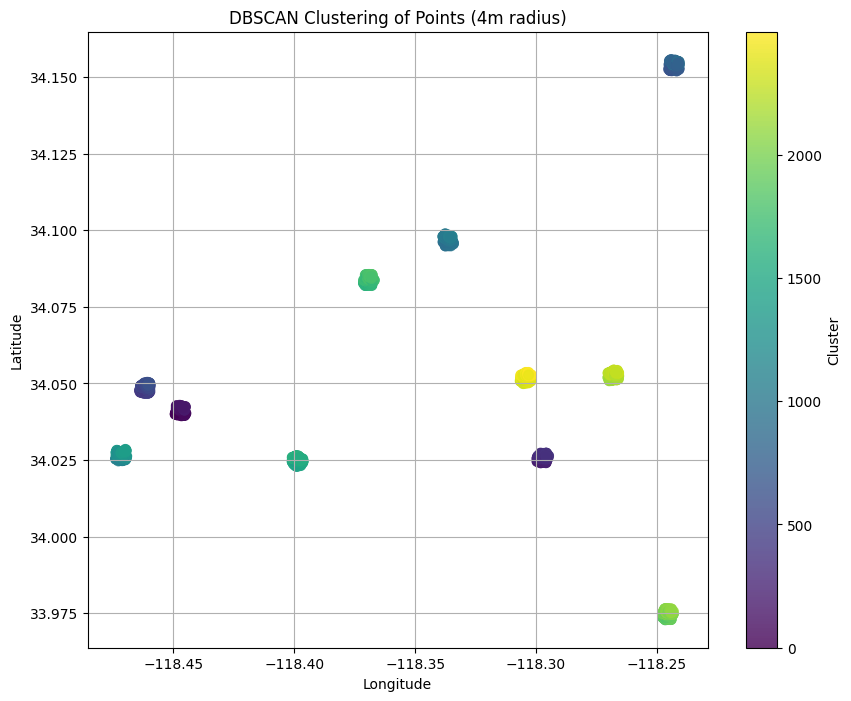

In [8]:
# Import necessary libraries for DBSCAN clustering

# Convert lat/lon to radians for haversine distance calculation
lat_lon_rad = np.radians(df[['lat', 'lon']].values)

# Calculate the epsilon value for DBSCAN
# 4 meters in radians (using LA-specific Earth radius)
# Earth radius varies by latitude - LA is around 34° N
lat_radians = np.radians(34.0)  # Approximate latitude of Los Angeles
earth_radius_km = 6378.137 * (1 - 0.0033528 * np.sin(lat_radians)**2)  # WGS84 ellipsoid model
epsilon_km = 0.004  # 4 meters in kilometers
epsilon_rad = epsilon_km / earth_radius_km

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon_rad, min_samples=1, metric='haversine')
df['cluster'] = dbscan.fit_predict(lat_lon_rad)

# Display the number of clusters found
num_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
print(f"Number of clusters: {num_clusters}")

# Display the dataframe with cluster assignments
print(df[['pano_id', 'lat', 'lon', 'cluster']].head(10))

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['lon'], df['lat'], c=df['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering of Points (4m radius)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
